# Matplotlib Basics

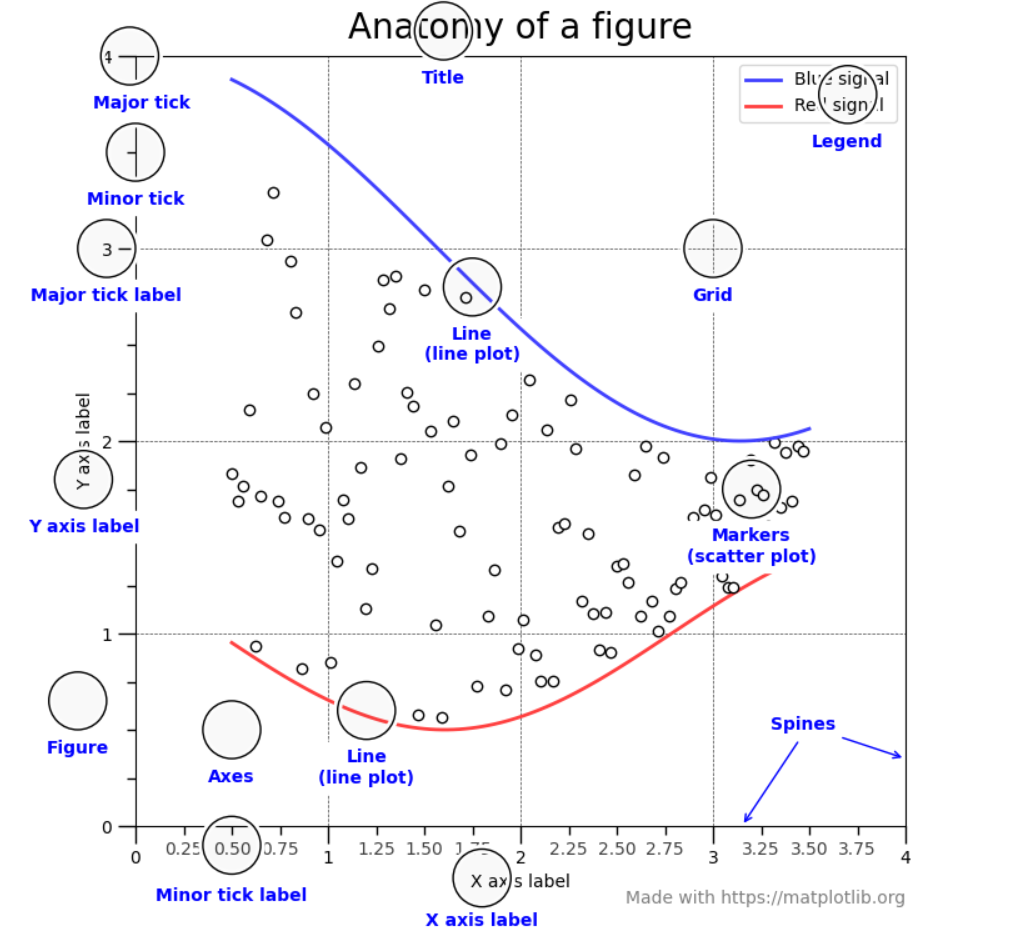

There are several layers to matplotlib, but as a beginner, the best way to start is to use the scripting layer pyplot. We import that as follows:-

In [1]:
import matplotlib.pyplot as plt

In [2]:
# let's get some data
import pandas as pd

file = 'HistoricalQuotes.csv'
data = pd.read_csv(file)
data

,Date,Close/Last,Volume,Open,High,Low
0,10/23/2020,$216.23,18879610,$215.03,$216.28,$213.16
1,10/22/2020,$214.89,22351450,$213.93,$216.055,$211.7
2,10/21/2020,$214.8,22724910,$213.12,$216.92,$213.12
3,10/20/2020,$214.65,22753510,$215.8,$217.37,$213.0901
4,10/19/2020,$214.22,27625840,$220.415,$222.3,$213.72
...,...,...,...,...,...,...
247,10/31/2019,$143.37,24605140,$144.9,$144.93,$142.99
248,10/30/2019,$144.61,18496590,$143.52,$145,$142.79
249,10/29/2019,$142.83,20589470,$144.08,$144.5,$142.65
250,10/28/2019,$144.19,35280140,$144.4,$145.67,$143.51


In [3]:
data.dtypes

Date           object
 Close/Last    object
 Volume         int64
 Open          object
 High          object
 Low           object
dtype: object

In [4]:
# set Date to datetime and make it index
data.Date = pd.to_datetime(data.Date)
data = data.set_index(data.Date)
data.dtypes

Date           datetime64[ns]
 Close/Last            object
 Volume                 int64
 Open                  object
 High                  object
 Low                   object
dtype: object

In [5]:
data

,Date,Close/Last,Volume,Open,High,Low
Date,,,,,,
2020-10-23,2020-10-23,$216.23,18879610,$215.03,$216.28,$213.16
2020-10-22,2020-10-22,$214.89,22351450,$213.93,$216.055,$211.7
2020-10-21,2020-10-21,$214.8,22724910,$213.12,$216.92,$213.12
2020-10-20,2020-10-20,$214.65,22753510,$215.8,$217.37,$213.0901
2020-10-19,2020-10-19,$214.22,27625840,$220.415,$222.3,$213.72
...,...,...,...,...,...,...
2019-10-31,2019-10-31,$143.37,24605140,$144.9,$144.93,$142.99
2019-10-30,2019-10-30,$144.61,18496590,$143.52,$145,$142.79
2019-10-29,2019-10-29,$142.83,20589470,$144.08,$144.5,$142.65


In [6]:
data.columns

Index(['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low'], dtype='object')

In [7]:
# remove white space from cols
data.rename(columns=lambda x: x.strip(), inplace=True)
data.columns

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [8]:
# remove dollar sign from prices and make them floats
data['Close/Last'] = data['Close/Last'].str.replace('$','')
data['Close/Last'] = data['Close/Last'].astype(float)
data['High'] = data['High'].str.replace('$','')
data['High'] = data['High'].astype(float)
data['Low'] = data['Low'].str.replace('$','')
data['Low'] = data['Low'].astype(float)
data['Volume'] = data['Volume'].astype(int)

In [10]:
data.dtypes
data['Open'] = data['Open'].str.replace('$','')
data['Open'] = data['Open'].astype(float)
data.dtypes

Date          datetime64[ns]
Close/Last           float64
Volume                 int32
Open                 float64
High                 float64
Low                  float64
dtype: object

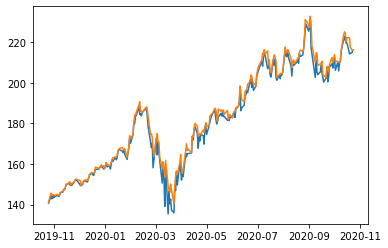

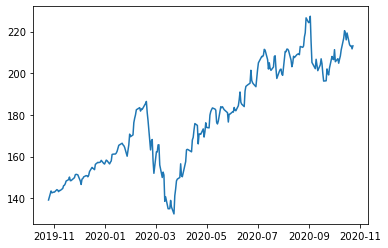

In [13]:
plt.plot(data.Date,data['Close/Last'])
plt.plot(data.Date,data['High'])

plt.show()

plt.plot(data.Date,data['Low'])

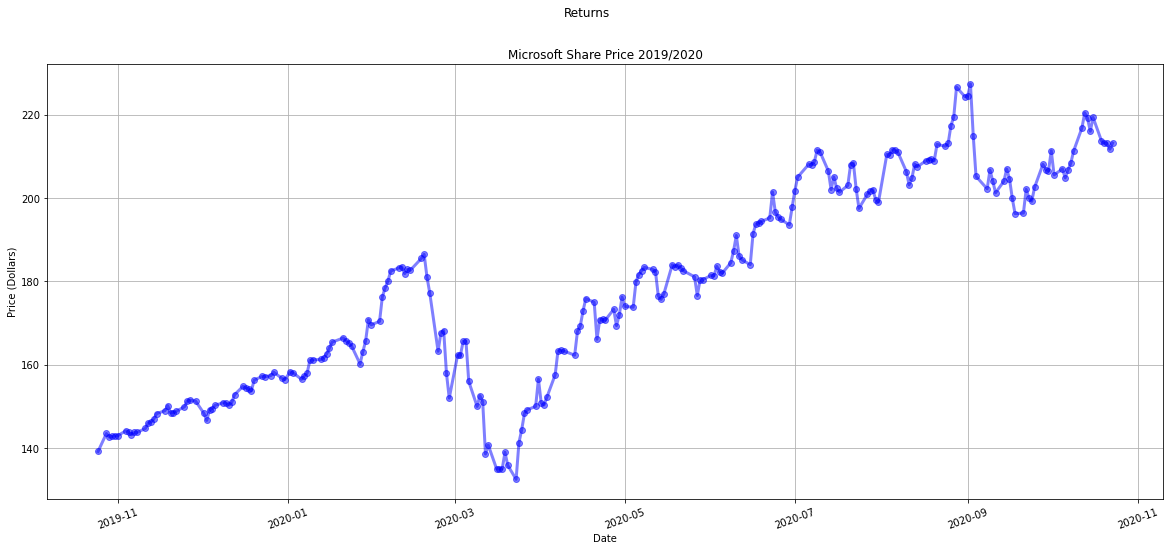

In [14]:
plt.figure(figsize=(20,8))
plt.plot(data.Date,data['Low'],color='b',marker='o',linewidth=3,alpha=0.5)
plt.title('Microsoft Share Price 2019/2020')
plt.suptitle('Returns')
plt.xlabel('Date')
plt.ylabel('Price (Dollars)')
plt.xticks(rotation=20)
plt.grid(True)
plt.show()

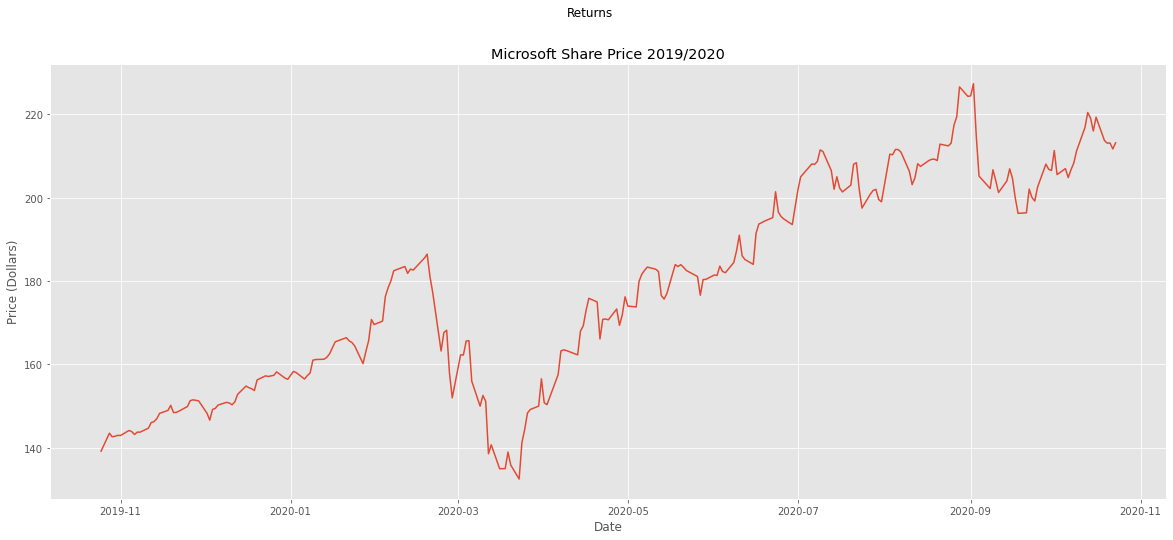

In [15]:
#what if we want to change the style?
plt.style.use('ggplot') #try ggplot,seaborn-pastel
plt.figure(figsize=(20,8))
plt.plot(data.Date,data['Low'])
plt.title('Microsoft Share Price 2019/2020')
plt.suptitle('Returns')
plt.xlabel('Date')
plt.ylabel('Price (Dollars)')
#plt.xticks(rotation=20)
#plt.grid(True)
plt.show()

In [16]:
# We can get a list of available styles
plt.style.available[:]

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [17]:
# When we use plt, matplotlib creates the figure for us. For more control we can create our own figure

fig = plt.figure()

<Figure size 432x288 with 0 Axes>

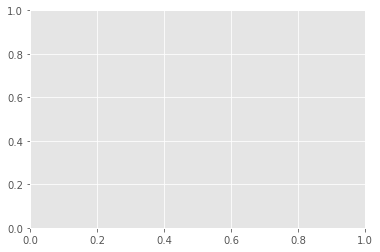

In [18]:
# The above creates 1 figure on to which we can add axes
ax = plt.axes()

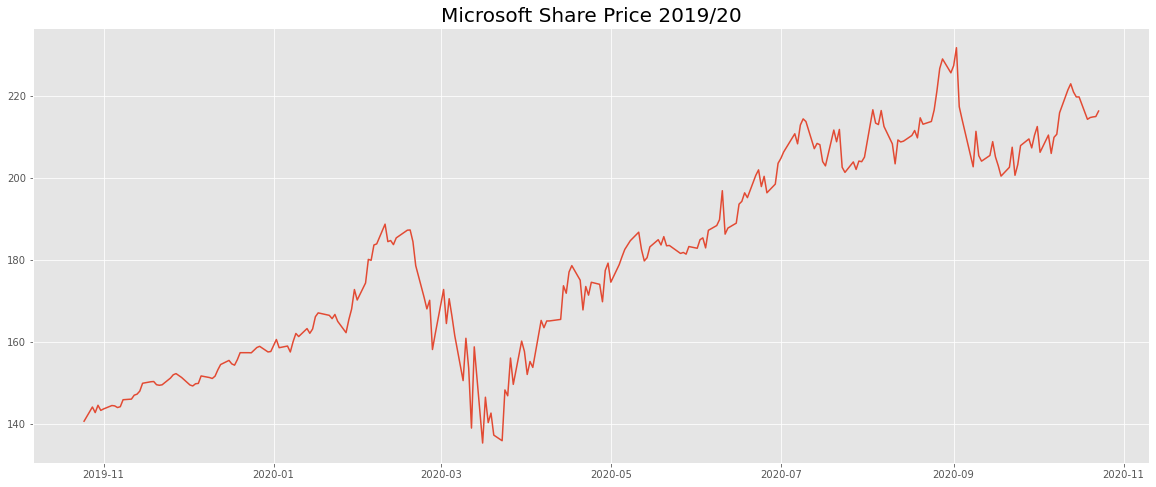

In [19]:
# Once we have the axes object we can plot data
fig = plt.figure(figsize=(20,8))
ax = plt.axes()
ax.plot(data.Date,data['Close/Last'])
ax.set_title('Microsoft Share Price 2019/20',color='black',fontsize=20)
plt.show()

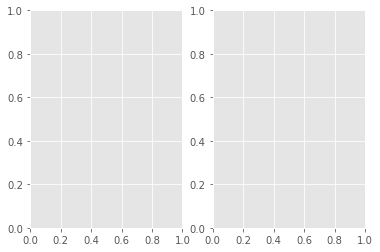

In [20]:
# Using fig and ax enables us have subplots

fig, (ax1, ax2) = plt.subplots(1,2) # We use plt.subplots(num_rows, num_cols)


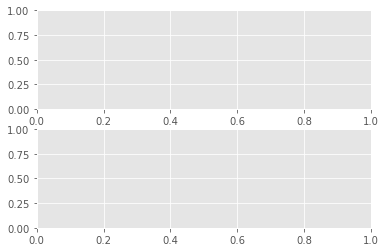

In [21]:
fig, (ax1, ax2) = plt.subplots(2,1) # 2 rows, 1 column

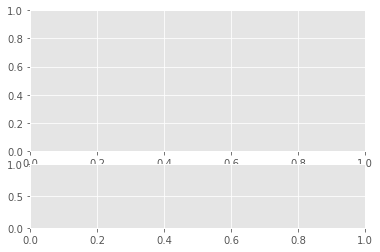

In [22]:
# Using subplots will give equal sized plots, add_gridspec allows the width to be specified

fig = plt.figure()
grid = fig.add_gridspec(3,1)
upper = fig.add_subplot(grid[0:2,0])
lower = fig.add_subplot(grid[2,0])



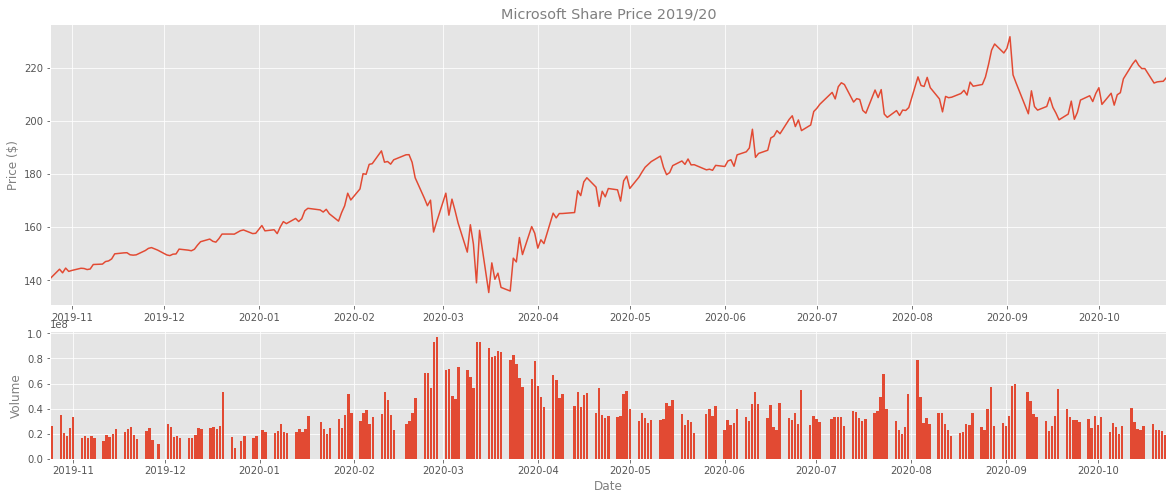

In [23]:
# Now we can plot volume data

fig = plt.figure(figsize=(20,8))

grid = fig.add_gridspec(3,1)
upper = fig.add_subplot(grid[0:2,0])

lower = fig.add_subplot(grid[2,0])
upper.plot(data.Date,data['Close/Last'])
lower.bar(data.Date,data['Volume'])
upper.set_title('Microsoft Share Price 2019/20', color='gray')
upper.set_ylabel('Price ($)', color='gray')
lower.set_ylabel('Volume', color='gray')
lower.set_xlabel('Date', color='gray')
upper.autoscale(enable=True, axis='x', tight=True)
lower.autoscale(enable=True, axis='x', tight=True)
plt.show()

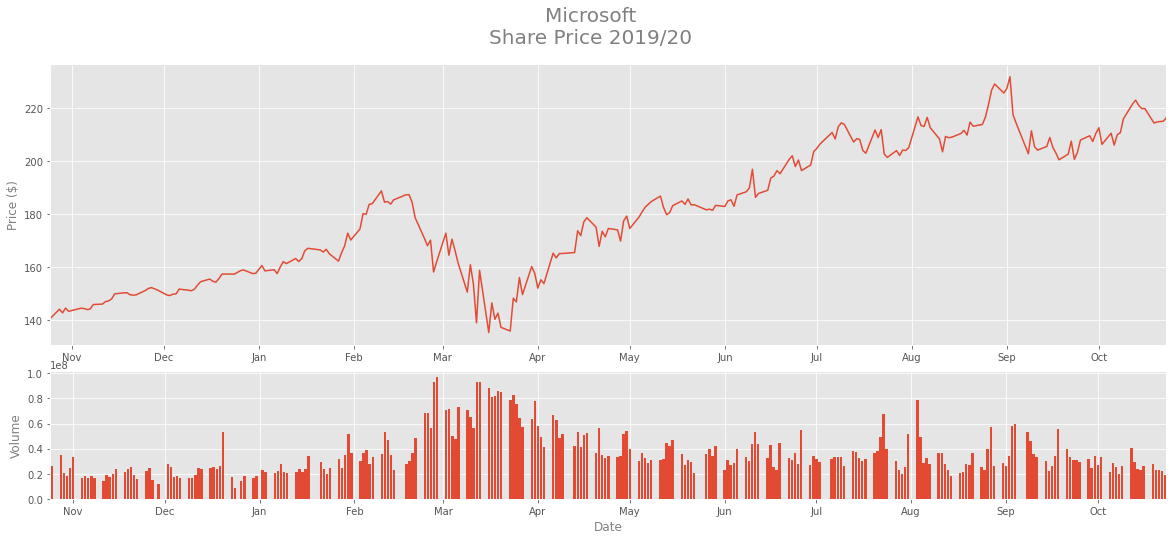

In [27]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

fig = plt.figure(figsize=(20,8))
fig.suptitle('Microsoft\nShare Price 2019/20', color='gray', fontsize=20)
grid = fig.add_gridspec(3,1)
upper = fig.add_subplot(grid[0:2,0])

lower = fig.add_subplot(grid[2,0])
upper.plot(data.Date,data['Close/Last'])
lower.bar(data.Date,data['Volume'])
#upper.set_title('Price', color='gray')
upper.set_ylabel('Price ($)', color='gray')
#lower.set_title('Volume', color='gray')
lower.set_ylabel('Volume', color='gray')
lower.set_xlabel('Date', color='gray')
upper.autoscale(enable=True, axis='x', tight=True)
lower.autoscale(enable=True, axis='x', tight=True)

date_form = DateFormatter("%b")
upper.xaxis.set_major_formatter(date_form)
lower.xaxis.set_major_formatter(date_form)

plt.savefig('msft_viz.png')
plt.show()